INSTALL NECESSARY LIBRARIES

!pip install tensorflow opencv-python matplotlib


In [1]:
import tensorflow as tf
import os

In [2]:
import cv2
import imghdr


C:\Users\User\AppData\Local\Temp\ipykernel_19356\89219108.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


Data Cleaning - delete all dodgy images


In [3]:
data_dir = 'data'

In [4]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [5]:
os.listdir(data_dir)

['happy', 'sad']

In [6]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            #img = cv2.imread(image_path)
            formatt = imghdr.what(image_path)
            if formatt not in image_exts:
                print('image not in correct format {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('image has issue'.format(image_path))
            
            
        

Load Data and Make data Pipeline

In [7]:
import numpy as np
from matplotlib import pyplot as plt

MAKING DATA PIPELINE

In [8]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 160 files belonging to 2 classes.


In [9]:
#no need to run . Just for explaining
data_iterator = data.as_numpy_iterator()

In [10]:
#no need to run . Just for explaining
batch = data_iterator.next()

In [11]:
len(batch)

2

PRE PROCESSING DATA

In [12]:
#normalization
data = data.map(lambda x, y : (x/255, y))

In [13]:
#make data an iterator. Otherwise we can not iterate through it 
scaled_iterator = data.as_numpy_iterator()

In [14]:
batch = scaled_iterator.next()

In [15]:
#in one batch there are 32 images, image size 256*256, 3 indicates 3 channels
batch[0].shape

(32, 256, 256, 3)

SPLITTING MY DATA


In [16]:
#how many batches
len(data)


5

In [17]:
train_size = int(len(data)* .7)
val_size = int(len(data) * .2)
test_size = int(len(data) * .1) 

In [18]:
train_size + val_size + test_size

4

In [19]:
train= data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(test_size + val_size).take(test_size)

In [20]:
type(train)

tensorflow.python.data.ops.take_op._TakeDataset

In [21]:
len(test)

0

3 DEEP MODEL


3.1 Making model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [23]:
model = Sequential()

In [24]:
Conv2D??

Init signature:
Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding='valid',
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs,
)
Source:        
@keras_export("keras.layers.Conv2D", "keras.layers.Convolution2D")
class Conv2D(Conv):
    """2D convolution layer (e.g. spatial convolution over images).

    This layer creates a convolution kernel that is convolved
    with the layer input to produce a tensor of
    outputs. If `use_bias` is True,
    a bias vector is created and added to the outputs. Finally, if
    `activation` is not `None`, it is applied to the outputs as well.

    When using this layer as the first layer in a model,
    provide the keyword argument `input_shape`
    (tuple of i

In [25]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

TRAIN

In [28]:
logdir = 'logs'

In [29]:
tensorboard_callbacks = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [30]:
hist = model.fit(train, epochs=20, validation_data = val, callbacks=[tensorboard_callbacks])

Epoch 1/20
3/3 [==============================] - 10s 2s/step - loss: 1.5685 - accuracy: 0.5208 - val_loss: 0.8216 - val_accuracy: 0.5312
Epoch 2/20
3/3 [==============================] - 8s 2s/step - loss: 0.9137 - accuracy: 0.5938 - val_loss: 0.7447 - val_accuracy: 0.6250
Epoch 3/20
3/3 [==============================] - 8s 2s/step - loss: 0.8725 - accuracy: 0.5104 - val_loss: 0.6914 - val_accuracy: 0.4688
Epoch 4/20
3/3 [==============================] - 7s 2s/step - loss: 0.7265 - accuracy: 0.5521 - val_loss: 0.5920 - val_accuracy: 0.7188
Epoch 5/20
3/3 [==============================] - 7s 2s/step - loss: 0.6535 - accuracy: 0.5729 - val_loss: 0.5531 - val_accuracy: 0.6875
Epoch 6/20
3/3 [==============================] - 8s 2s/step - loss: 0.5825 - accuracy: 0.7604 - val_loss: 0.5371 - val_accuracy: 0.9062
Epoch 7/20
3/3 [==============================] - 8s 2s/step - loss: 0.5711 - accuracy: 0.7917 - val_loss: 0.5514 - val_accuracy: 0.6875
Epoch 8/20
3/3 [========================

In [31]:
hist.history

{'loss': [1.5685371160507202,
  0.9137067794799805,
  0.8724861145019531,
  0.7264804840087891,
  0.653482973575592,
  0.5825453400611877,
  0.5710532665252686,
  0.5117254853248596,
  0.4045102596282959,
  0.42333027720451355,
  0.41630157828330994,
  0.35076332092285156,
  0.3228361904621124,
  0.2434196025133133,
  0.2018064707517624,
  0.19057844579219818,
  0.15389807522296906,
  0.10526459664106369,
  0.08480614423751831,
  0.06147868558764458],
 'accuracy': [0.5208333134651184,
  0.59375,
  0.5104166865348816,
  0.5520833134651184,
  0.5729166865348816,
  0.7604166865348816,
  0.7916666865348816,
  0.7708333134651184,
  0.8229166865348816,
  0.78125,
  0.8541666865348816,
  0.8333333134651184,
  0.9166666865348816,
  0.9479166865348816,
  0.9270833134651184,
  0.9479166865348816,
  0.9583333134651184,
  0.9791666865348816,
  0.9895833134651184,
  0.9895833134651184],
 'val_loss': [0.8215847015380859,
  0.7447199821472168,
  0.6914488077163696,
  0.5919567346572876,
  0.553094387

PLOT PERFORMANCE

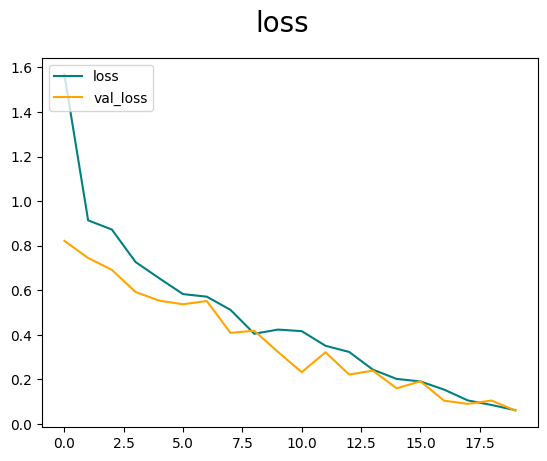

In [32]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('loss', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

EVALUATE PERFORMANCE

In [33]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [34]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [35]:
for batch in test.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [36]:
print(f'precision: {pre.result().numpy()}, recall: {re.result().numpy()}, accuracy: {acc.result().numpy()}')

precision: 0.0, recall: 0.0, accuracy: 0.0


TEST

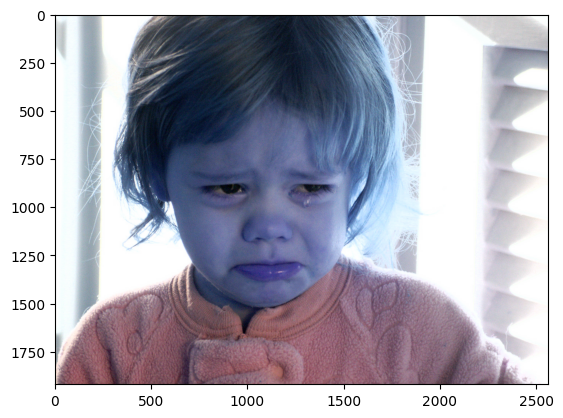

In [50]:
img = cv2.imread('sad2.jpeg')
plt.imshow(img)
plt.show()

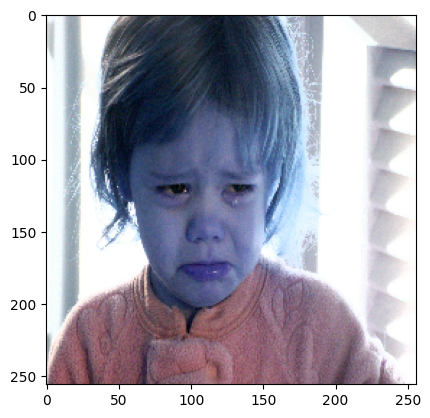

In [51]:
resized_img = tf.image.resize(img, (256, 256))
plt.imshow(resized_img.numpy().astype(int))
plt.show()

In [52]:
yhat = model.predict(np.expand_dims(resized_img/255, 0))

1/1 [==============================] - 0s 49ms/step


In [53]:
yhat

array([[0.9482994]], dtype=float32)

SAVE MODEL


In [54]:
from tensorflow.keras.models import load_model

In [56]:
model.save(os.path.join('models', 'happy_sad_model.h5'))

D:\ML projects\IMAGE CLASSIFICATION\imageclassification_environment\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [57]:
new_model = load_model(os.path.join('models', 'happy_sad_model.h5'))

In [59]:
new_model

In [60]:
yhat_new = new_model.predict(np.expand_dims(resized_img/255, 0))

1/1 [==============================] - 0s 98ms/step


In [61]:
#work perfectly
yhat_new

array([[0.9482994]], dtype=float32)